In [1]:
import numpy as np
data = np.loadtxt("train_ML5_2.csv", delimiter=',')
data.shape

(7176, 5)

In [2]:
from sklearn import model_selection
data_train, data_test = model_selection.train_test_split(data)
print(data_train.shape)
print(data_test.shape)

(5382, 5)
(1794, 5)


In [5]:
x_train = data_train[:,:4]
y_train = data_train[:,4]

x_test = data_test[:,:4]
y_test = data_test[:,4]

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5382, 4)
(1794, 4)
(5382,)
(1794,)


In [6]:
from sklearn.linear_model import LinearRegression
alg1 = LinearRegression()
alg1.fit(x_train,y_train)

LinearRegression()

In [7]:
alg1.coef_

array([-1.99025399, -0.22952406,  0.04906874, -0.16023075])

In [8]:
alg1.intercept_

467.9781265402146

In [9]:
y_pred = alg1.predict(x_test)

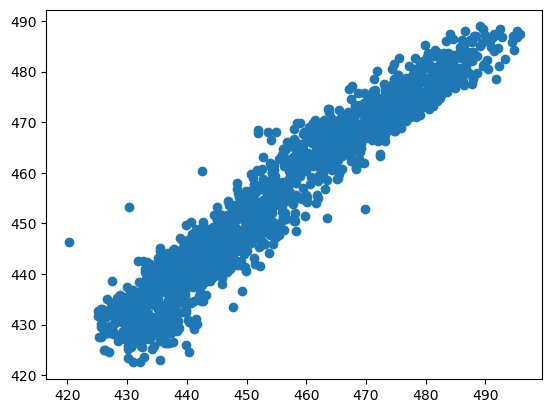

In [10]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.show()

In [11]:
alg1.score(x_test,y_test)

0.9313498415219726

In [12]:
alg1.score(x_train,y_train)

0.9278448732795779

In [47]:
def step_gradient(points, learning_rate, coefficients):
    m = coefficients[:-1]  # Extracting coefficients for features
    c = coefficients[-1]   # Extracting the intercept
    m_slope = np.zeros_like(m)
    c_slope = 0
    M = len(points)
    for i in range(M):
        x = points[i, :-1]  # Extract features (all but the last column)
        y = points[i, -1]   # Extract the target variable (last column)
        m_slope += (-2/M) * (y - np.dot(m, x) - c) * x
        c_slope += (-2/M) * (y - np.dot(m, x) - c)
    new_coefficients = np.zeros_like(coefficients)
    new_coefficients[:-1] = m - learning_rate * m_slope
    new_coefficients[-1] = c - learning_rate * c_slope
    return new_coefficients

In [48]:
def gd(points, learning_rate, num_iteration):
    coefficients = np.zeros(points.shape[1])  # Initialize coefficients with zeros
    for i in range(num_iteration):
        coefficients = step_gradient(points, learning_rate, coefficients)
        m = coefficients[:-1]
        c = coefficients[-1]
        #print(i, " Cost: ", cost(points, m, c))
    return coefficients[:-1], coefficients[-1]

In [49]:
def cost(points, m, c):
    total_cost = 0
    M = len(points)
    for i in range(M):
        x = points[i, :-1]
        y = points[i, -1]
        total_cost += (1/M) * ((y - np.dot(m, x) - c) ** 2)
    return total_cost

In [50]:
def predict(X, m, c):
    return np.dot(X, m) + c

In [51]:
def score(y_test, y_test_pred):
    u = ((y_test - y_test_pred) ** 2).sum()
    v = ((y_test - y_test.mean()) ** 2).sum()
    return 1 - u / v

In [52]:
learning_rate = 0.00000095
num_iteration = 10000
m, c = gd(data_train, learning_rate, num_iteration)
print("m, c: ",m, c)

#test data
y_test_pred = predict(x_test, m, c)
print("Test Score: ", score(y_test, y_test_pred))

#train data
y_train_pred = predict(x_train, m, c)
print("Train Score: ", score(y_train, y_train_pred))

m, c:  [-0.60090935 -0.73072213  0.49204327  0.09956914] 0.0003550981306430046
Test Score:  0.8663059925698391
Train Score:  0.8659321101174197
